In [31]:
import logging
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import auc, plot_roc_curve, roc_curve

from highlighter.utils.load import DataSetLoader
from highlighter.utils.train import get_dftrain_and_dfeval
from highlighter.common import feature_columns

In [32]:
ds = DataSetLoader().load_dataset()

dftrain, dfeval = get_dftrain_and_dfeval(ds, non_hls_size=5)
y_train = dftrain.pop("hl")
y_eval = dfeval.pop("hl")

print("Complete!")

Read twitch-data/chats/chats-840859405-11820.0.csv
Read twitch-data/chats/chats-841476435-37260.0.csv
Read twitch-data/chats/chats-842034638-7560.0.csv
Read twitch-data/chats/chats-842681261-47460.0.csv
Read twitch-data/chats/chats-846111897-33660.0.csv
Read twitch-data/chats/chats-846697408-6240.0.csv
Read twitch-data/chats/chats-847271566-25200.0.csv
Read twitch-data/chats/chats-848395376-43020.0.csv
Read twitch-data/chats/chats-848944673-5760.0.csv
Read twitch-data/chats/chats-849302446-25200.0.csv
Read twitch-data/chats/chats-850266962-27960.0.csv
Read twitch-data/chats/chats-850693720-26100.0.csv
Read twitch-data/chats/chats-851421431-18600.0.csv
Read twitch-data/chats/chats-856281191-48480.0.csv
Read twitch-data/chats/chats-857359079-42780.0.csv
Read twitch-data/chats/chats-858487421-43440.0.csv
Read twitch-data/chats/chats-859685621-44460.0.csv
Read twitch-data/chats/chats-860859118-34200.0.csv
Read twitch-data/chats/chats-863268787-5760.0.csv
Read twitch-data/chats/chats-865042

In [33]:
print(dftrain.head())
print()
print(dict(dftrain))
print()
print("Train DataSet")
print(y_train.value_counts())
print()
print("Test DataSet")
print(y_eval.value_counts())

        num       len
0  0.222642  0.261325
1  0.092742  0.212054
2  0.595238  0.336905
3  0.225806  0.333177
4  0.078261  0.311111

Train DataSet
0    283
1     56
Name: hl, dtype: int64

Test DataSet
0    122
1     25
Name: hl, dtype: int64


In [34]:
dftrain.shape[0], dfeval.shape[0]

(339, 147)

<AxesSubplot:>

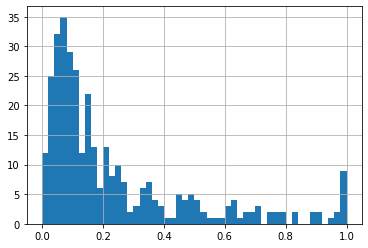

In [35]:
dftrain.num.hist(bins=50)

<AxesSubplot:>

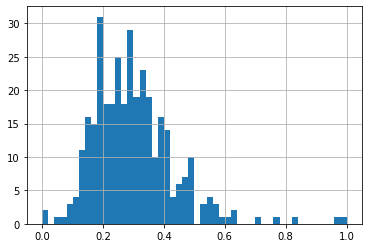

In [36]:
dftrain.len.hist(bins=50)

In [37]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds

    return input_function


train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [38]:
in_ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in in_ds.take(1):
  print('Key:', list(feature_batch.keys()))
  print()
  print('Labels:', label_batch.numpy())

Key: ['num', 'len']

Labels: [0 0 0 0 0 1 0 1 0 0]


In [39]:
linear_est = tf.estimator.LinearClassifier(
    feature_columns=feature_columns, model_dir="model"
)
history = linear_est.train(train_input_fn)

print("Training complete!")

INFO:tensorflow:Using default config.
[2021-01-23 02:09:41] tensorflow (line 1825): INFO - Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[2021-01-23 02:09

In [40]:
result = linear_est.evaluate(eval_input_fn)
print(result)

INFO:tensorflow:Calling model_fn.
[2021-01-23 02:09:42] tensorflow (line 1162): INFO - Calling model_fn.
INFO:tensorflow:Done calling model_fn.
[2021-01-23 02:09:43] tensorflow (line 1164): INFO - Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-23T02:09:43Z
[2021-01-23 02:09:43] tensorflow (line 255): INFO - Starting evaluation at 2021-01-23T02:09:43Z
INFO:tensorflow:Graph was finalized.
[2021-01-23 02:09:43] tensorflow (line 246): INFO - Graph was finalized.
INFO:tensorflow:Restoring parameters from model\model.ckpt-11870
[2021-01-23 02:09:43] tensorflow (line 1292): INFO - Restoring parameters from model\model.ckpt-11870
INFO:tensorflow:Running local_init_op.
[2021-01-23 02:09:43] tensorflow (line 505): INFO - Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[2021-01-23 02:09:43] tensorflow (line 508): INFO - Done running local_init_op.
INFO:tensorflow:Inference Time : 0.47203s
[2021-01-23 02:09:44] tensorflow (line 273): INFO - Inference Time 

In [41]:
pred_dicts = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.
[2021-01-23 02:09:44] tensorflow (line 1162): INFO - Calling model_fn.
INFO:tensorflow:Done calling model_fn.
[2021-01-23 02:09:44] tensorflow (line 1164): INFO - Done calling model_fn.
INFO:tensorflow:Graph was finalized.
[2021-01-23 02:09:44] tensorflow (line 246): INFO - Graph was finalized.
INFO:tensorflow:Restoring parameters from model\model.ckpt-11870
[2021-01-23 02:09:44] tensorflow (line 1292): INFO - Restoring parameters from model\model.ckpt-11870
INFO:tensorflow:Running local_init_op.
[2021-01-23 02:09:44] tensorflow (line 505): INFO - Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[2021-01-23 02:09:44] tensorflow (line 508): INFO - Done running local_init_op.


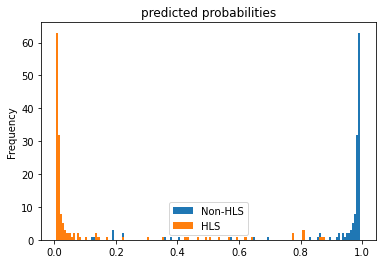

In [42]:
gdf = pd.DataFrame(
    [[pred["probabilities"][0], pred["probabilities"][1]] for pred in pred_dicts],
    columns=["Non-HLS", "HLS"],
)
gdf.plot.hist(bins=147, title="predicted probabilities")
plt.show()

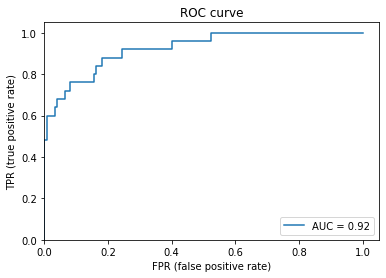

In [43]:
probs = pd.Series([pred["probabilities"][1] for pred in pred_dicts])

fpr, tpr, _ = roc_curve(y_eval, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.xlabel("FPR (false positive rate)")
plt.ylabel("TPR (true positive rate)")
plt.xlim(0)
plt.ylim(0)
plt.show()